# **Setup**

In [1]:
import cv2
import pandas as pd
import numpy as np
import os
import rembg
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

c:\Users\Akmal Muzakki\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


# **EDA**

In [7]:
DATASET_PATH = 'base-dataset/train.csv'
IMAGE_PATH = 'base-dataset/train/train/'

In [8]:
df = pd.read_csv(DATASET_PATH)

reverse_mapping_jenis = {
    0: 'kaos',
    1: 'hoodie'
}

reverse_mapping_warna = {
    0: 'merah',
    1: 'kuning',
    2: 'biru',
    3: 'hitam',
    4: 'putih'   
}

df['id'] = df['id'].apply(lambda x: f'{x}.png')
df['jenis'] = df['jenis'].map(reverse_mapping_jenis)
df['warna'] = df['warna'].map(reverse_mapping_warna)
df.head()

id   jenis   warna
0  1.png  hoodie  kuning
1  2.png    kaos    biru
2  3.png  hoodie   hitam
3  4.png  hoodie  kuning
4  5.png    kaos   putih

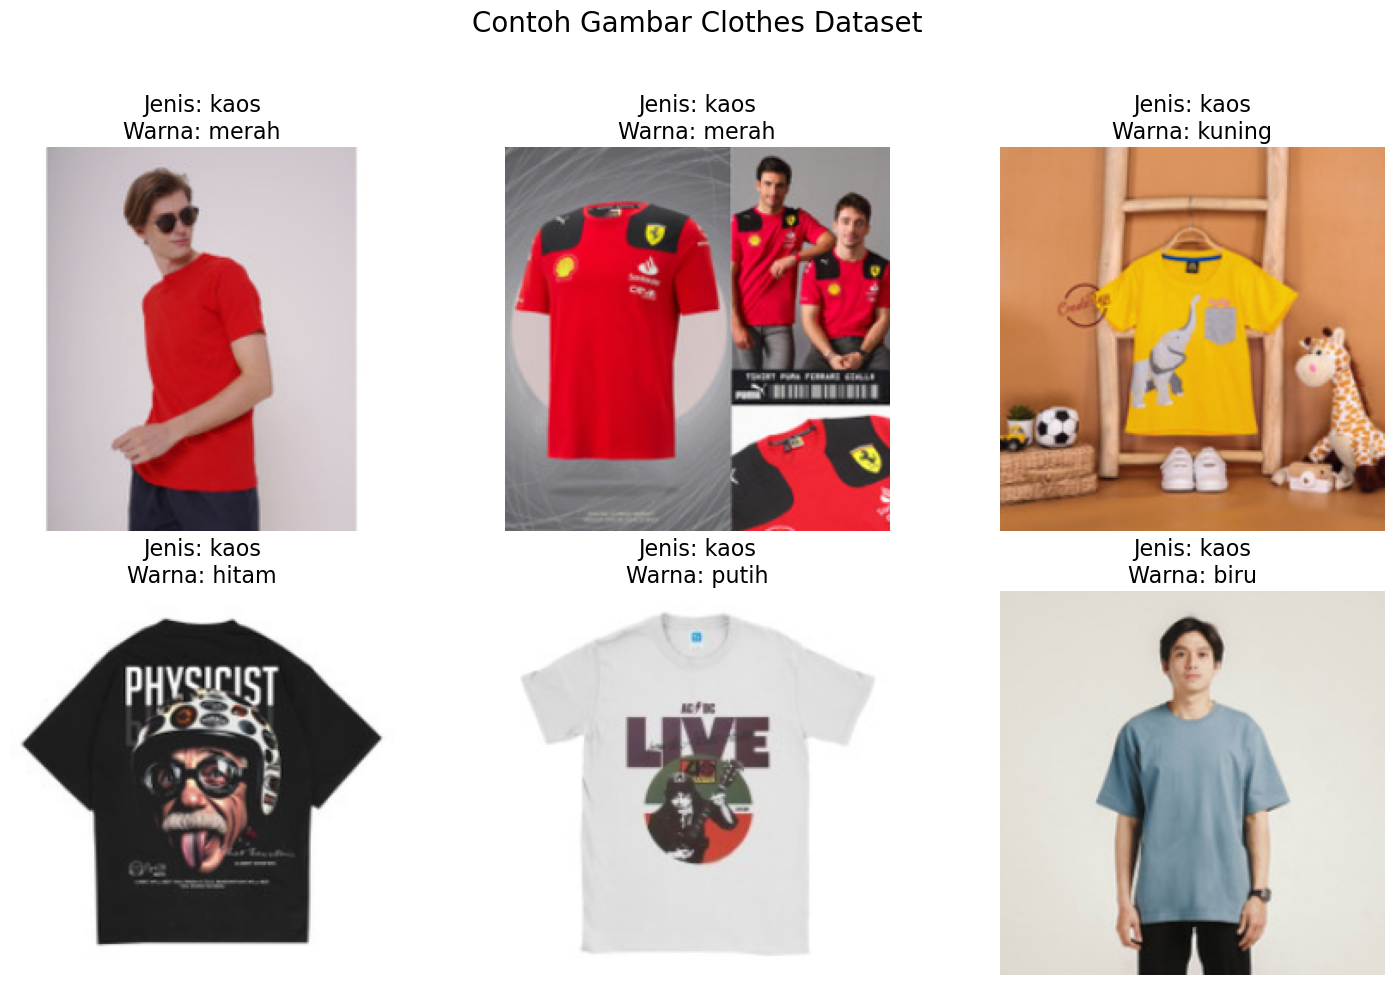

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))

plt.suptitle("Contoh Gambar Clothes Dataset", fontsize=20)

for i in range(2):
    for j in range(3):
        idx = np.random.randint(0, df.shape[0])
        img = cv2.imread(IMAGE_PATH + df.iloc[idx]['id'])
        img = cv2.resize(img, (224, 224))
        ax[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i, j].set_title(f"Jenis: {df.iloc[idx]['jenis']}\nWarna: {df.iloc[idx]['warna']}", fontsize=16)
        ax[i, j].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **Distribution of Color of Clothes**

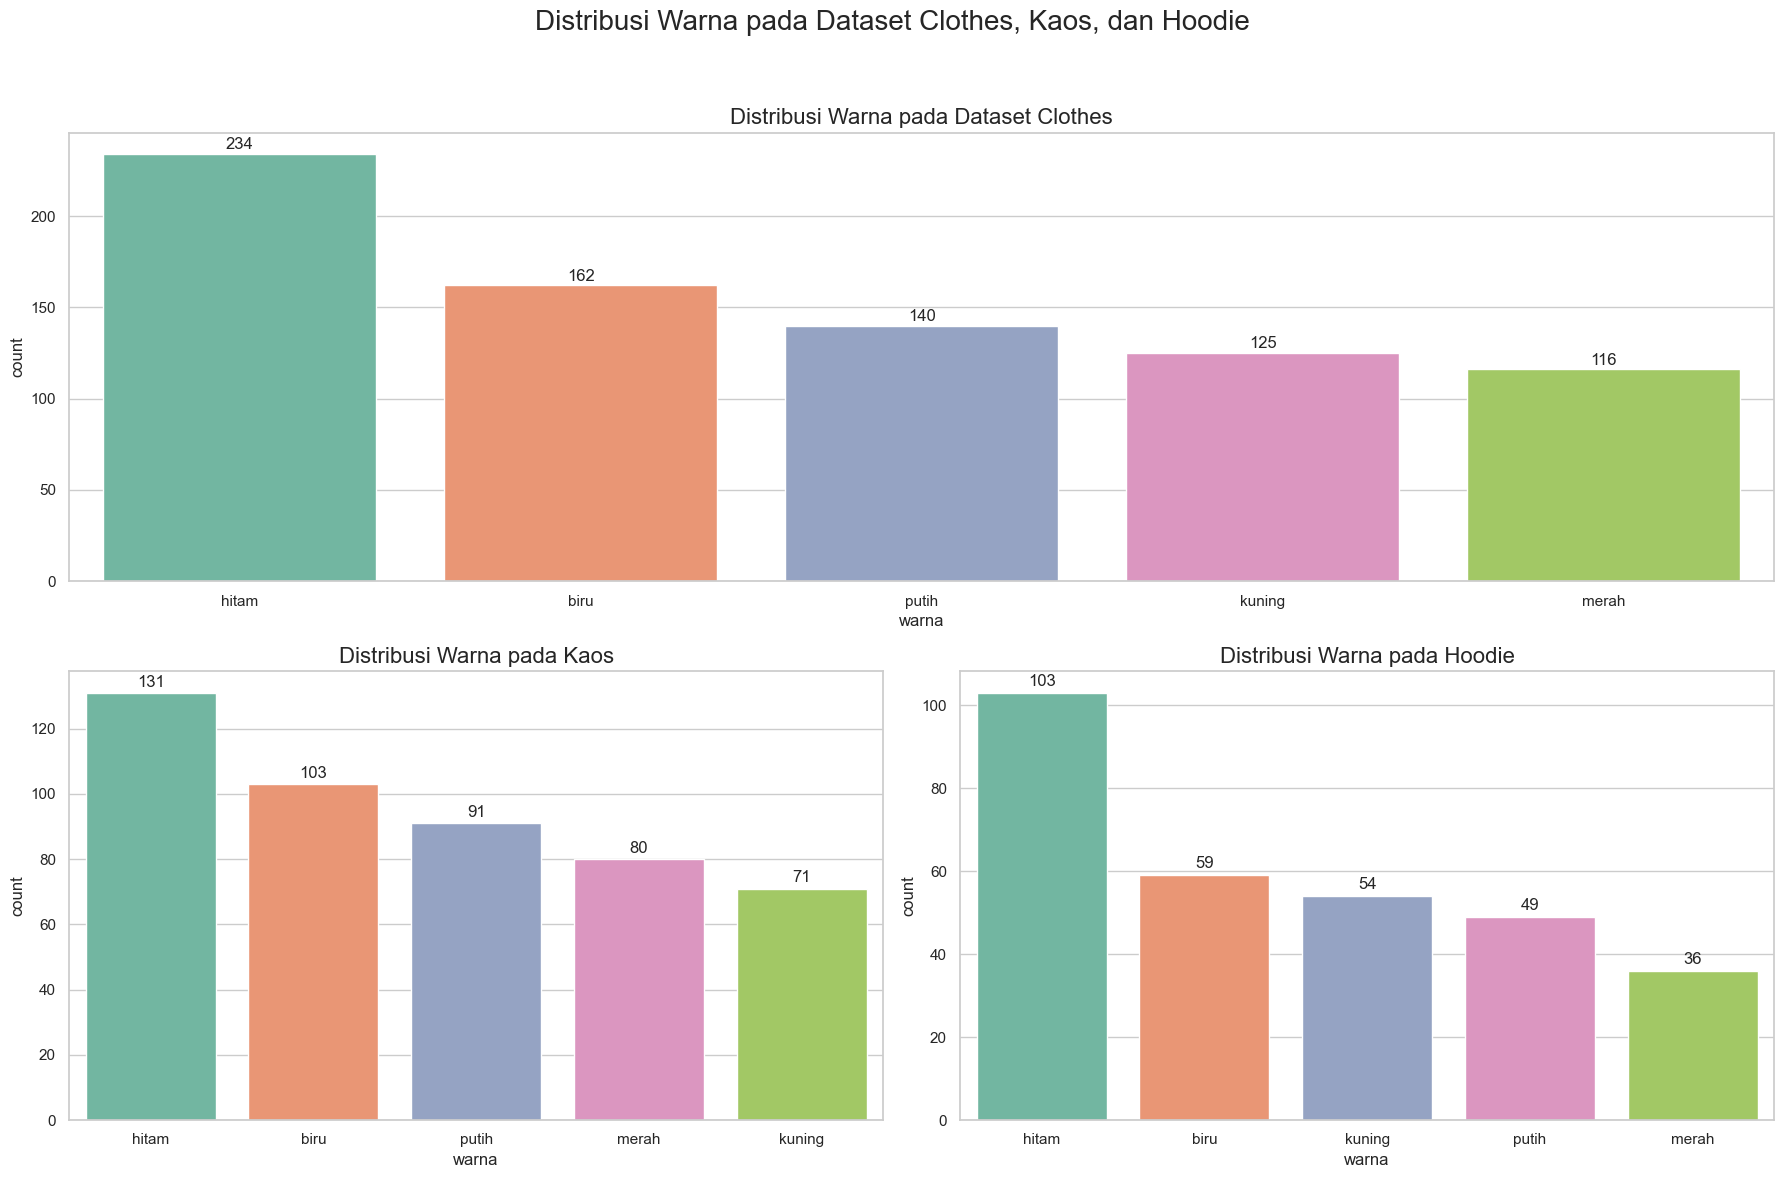

In [129]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(18, 12))
grid = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1, 1])

fig.suptitle('Distribusi Warna pada Dataset Clothes, Kaos, dan Hoodie', fontsize=20)

ax1 = fig.add_subplot(grid[0, :])
sns.countplot(ax=ax1, x=df['warna'], order=df['warna'].value_counts().index, palette='Set2')
ax1.set_title('Distribusi Warna pada Dataset Clothes', fontsize=16)
for i, txt in enumerate(df['warna'].value_counts()):
    ax1.text(i, txt + 1, txt, ha='center', va='bottom', fontsize=12)

ax2 = fig.add_subplot(grid[1, 0])
sns.countplot(ax=ax2, x=df[df['jenis'] == 'kaos']['warna'], 
              order=df[df['jenis'] == 'kaos']['warna'].value_counts().index, palette='Set2')
ax2.set_title('Distribusi Warna pada Kaos', fontsize=16)
for i, txt in enumerate(df[df['jenis'] == 'kaos']['warna'].value_counts()):
    ax2.text(i, txt + 1, txt, ha='center', va='bottom', fontsize=12)

ax3 = fig.add_subplot(grid[1, 1])
sns.countplot(ax=ax3, x=df[df['jenis'] == 'hoodie']['warna'], 
              order=df[df['jenis'] == 'hoodie']['warna'].value_counts().index, palette='Set2')
ax3.set_title('Distribusi Warna pada Hoodie', fontsize=16)
for i, txt in enumerate(df[df['jenis'] == 'hoodie']['warna'].value_counts()):
    ax3.text(i, txt + 1, txt, ha='center', va='bottom', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

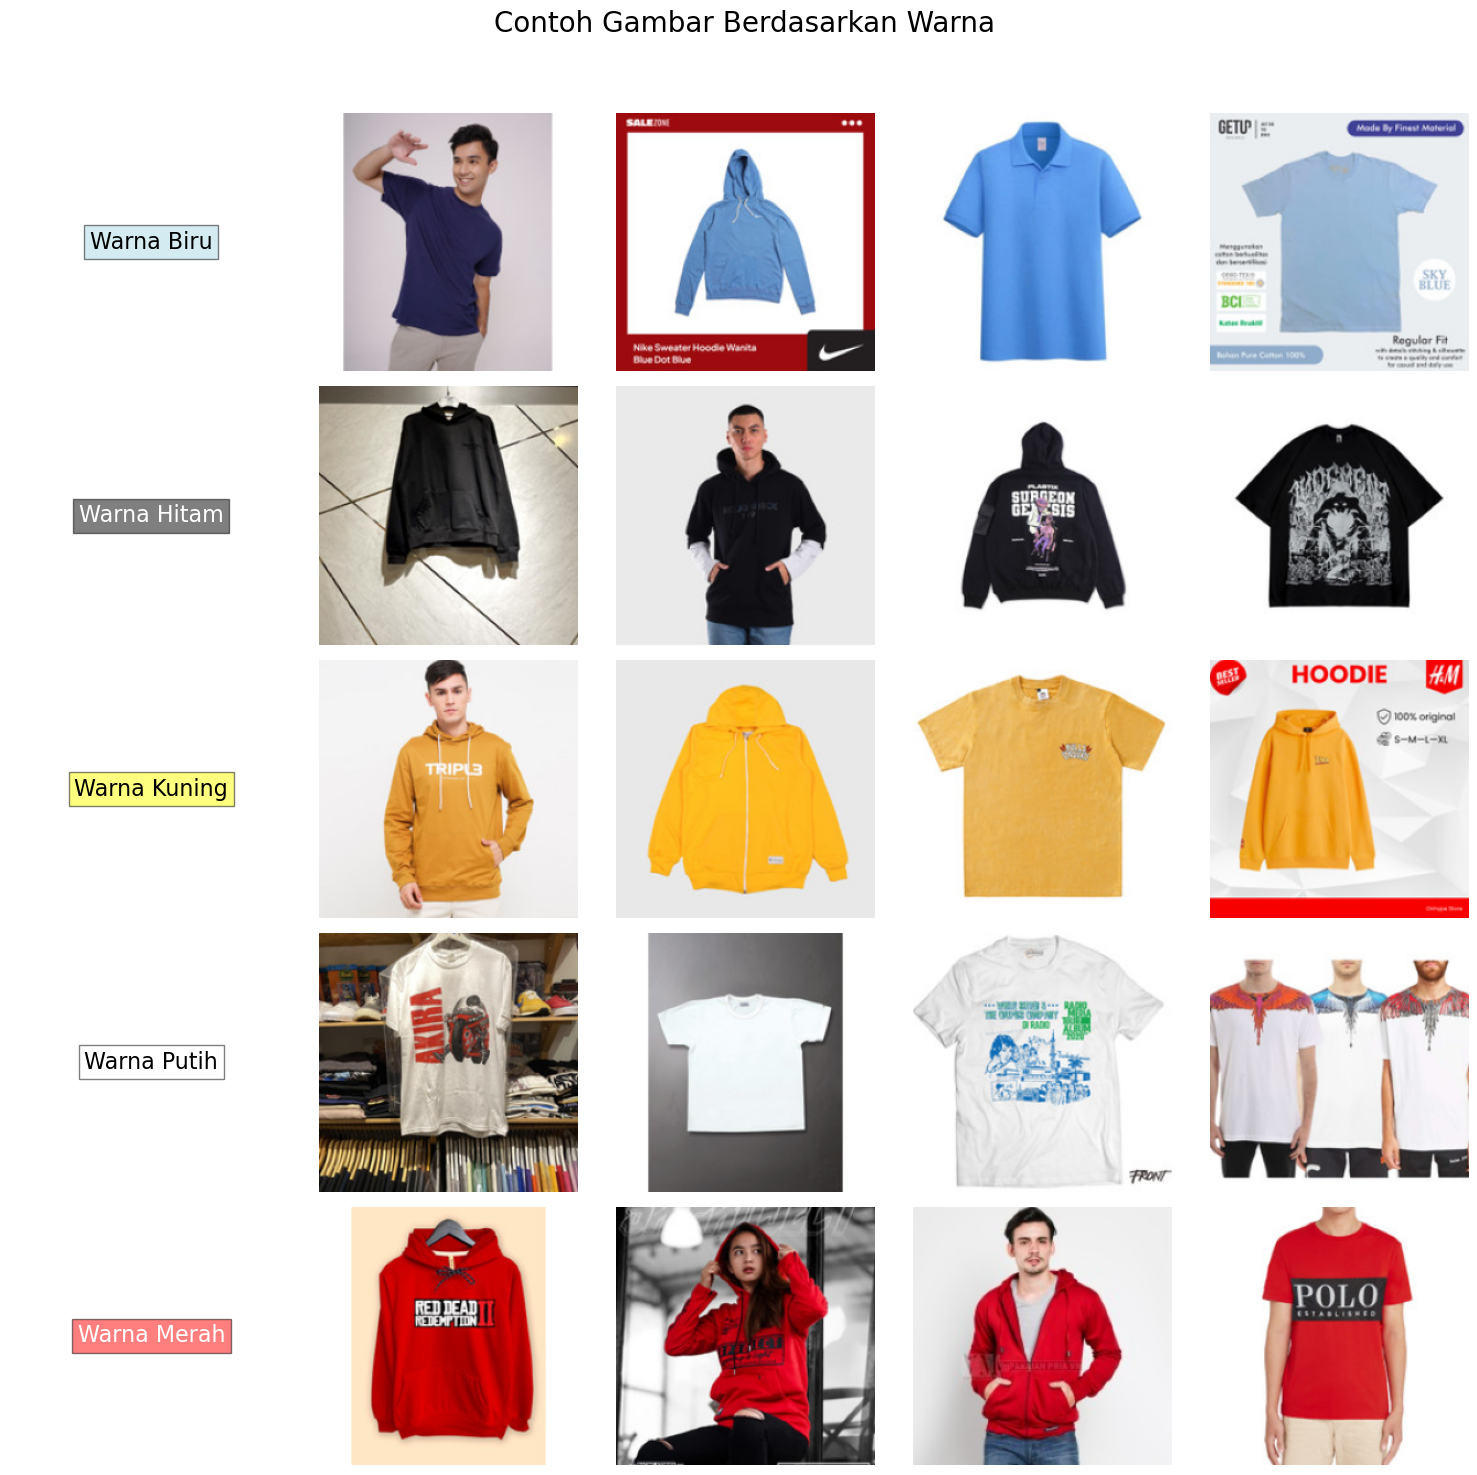

In [54]:
plt.figure(figsize=(15, 15))

color_rows = [
    ('Warna Biru', 'biru', 'lightblue', 'black'),
    ('Warna Hitam', 'hitam', 'black', 'white'),
    ('Warna Kuning', 'kuning', 'yellow', 'black'),
    ('Warna Putih', 'putih', 'white', 'black'),
    ('Warna Merah', 'merah', 'red', 'white')
]

plt.suptitle('Contoh Gambar Berdasarkan Warna', fontsize=20)

for row_idx, (color_text, color_value, box_color, text_color) in enumerate(color_rows):
    for i in range(5):
        plt.subplot(5, 5, row_idx * 5 + i + 1) 
        
        if i == 0:
            plt.text(0.5, 0.5, color_text, color=text_color, fontsize=16, 
                     ha='center', va='center', bbox=dict(facecolor=box_color, alpha=0.5))
            plt.axis('off')
        else:
            img_id = df[df['warna'] == color_value]['id'].values[i - 1]
            img = cv2.imread(IMAGE_PATH + str(img_id)) 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            img = cv2.resize(img, (224, 224))
            
            plt.imshow(img)
            plt.axis('off') 

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## **Distribution of Type of Clothes**

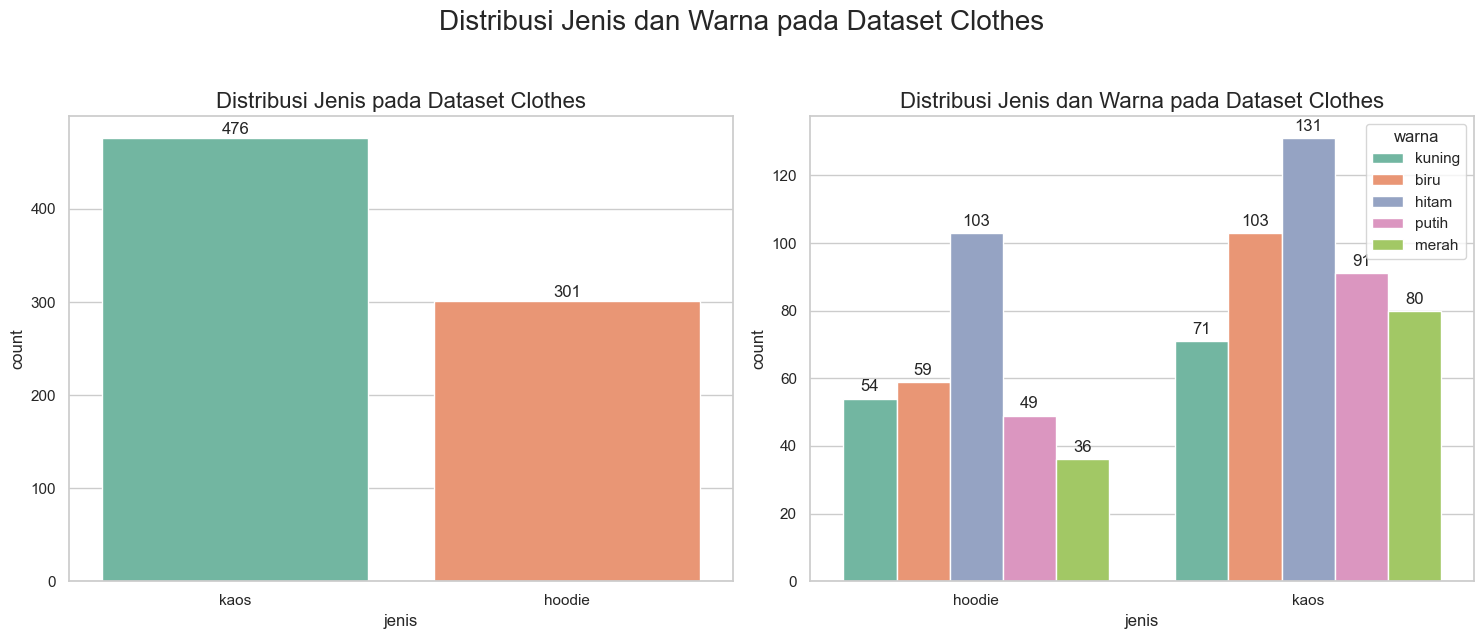

In [141]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(15, 6.5))

plt.suptitle("Distribusi Jenis dan Warna pada Dataset Clothes", fontsize=20)

sns.countplot(ax=ax[0], x=df['jenis'], order=df['jenis'].value_counts().index, palette='Set2')
ax[0].set_title('Distribusi Jenis pada Dataset Clothes', fontsize=16)
for i, txt in enumerate(df['jenis'].value_counts()):
    ax[0].text(i, txt + 1, txt, ha='center', va='bottom', fontsize=12)

sns.countplot(ax=ax[1], x=df['jenis'], hue=df['warna'], palette='Set2')
ax[1].set_title('Distribusi Jenis dan Warna pada Dataset Clothes', fontsize=16)

for container in ax[1].containers:
    ax[1].bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

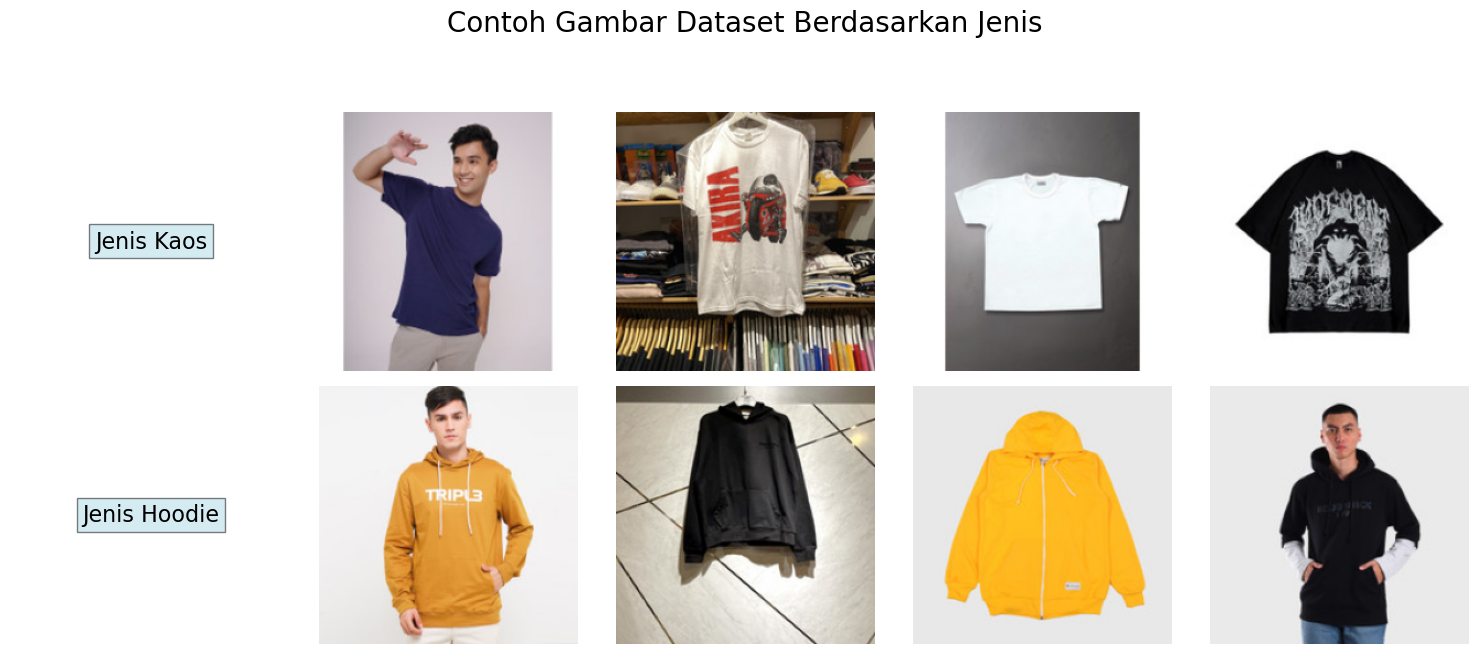

In [46]:
plt.figure(figsize=(15, 15))

type_rows = [
    ('Jenis Kaos', 'kaos', 'lightblue', 'black'),
    ('Jenis Hoodie', 'hoodie', 'lightblue', 'black')
]

plt.suptitle('Contoh Gambar Dataset Berdasarkan Jenis', fontsize=20)

for row_idx, (type_text, type_value, box_color, text_color) in enumerate(type_rows):
    for i in range(5):
        plt.subplot(5, 5, row_idx * 5 + i + 1) 
        
        if i == 0:
            plt.text(0.5, 0.5, type_text, color=text_color, fontsize=16, 
                     ha='center', va='center', bbox=dict(facecolor=box_color, alpha=0.5))
            plt.axis('off')
        else:
            img_id = df[df['jenis'] == type_value]['id'].values[i - 1]
            img = cv2.imread(IMAGE_PATH + str(img_id)) 
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            img = cv2.resize(img, (224, 224))
            plt.imshow(img)
            plt.axis('off')
            
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Preprocessing**

## **Convert Extension of Image**

In [21]:
TRAIN_PATH = 'base-dataset/train/train/'
TEST_PATH = 'base-dataset/test/test/'

In [74]:
"""
Beberapa gambar pada dataset memiliki ekstensi yang berbeda, maka kami fokuskan untuk mengonversi gambar keseluruhan
menjadi format PNG.
"""

def convert_to_png(PATH):
    filenames = os.listdir(PATH)
    for filename in tqdm(filenames, desc=f"Converting images in {PATH}"):
        if filename.endswith('.jpg'):
            img = cv2.imread(PATH + filename)
            cv2.imwrite(PATH + filename[:-4] + '.png', img)
            os.remove(PATH + filename)
            
convert_to_png(TRAIN_PATH)
convert_to_png(TEST_PATH)

Converting images in penyisihan-hology-7-data-mining-competition/train/train/:   0%|          | 0/1466 [00:00<?, ?it/s]

Converting images in penyisihan-hology-7-data-mining-competition/train/train/: 100%|██████████| 1466/1466 [07:31<00:00,  3.24it/s]
Converting images in penyisihan-hology-7-data-mining-competition/test/test/: 100%|██████████| 334/334 [00:07<00:00, 47.24it/s]


## **Generate Mask of Image**

In [10]:
TRAIN_PATH = 'base-dataset/train/train/'
TRAIN_PATH_SAVE = 'dataset/train_preproc/'

TEST_PATH = 'base-dataset/test/test/'
TEST_PATH_SAVE = 'dataset/test_preproc/'

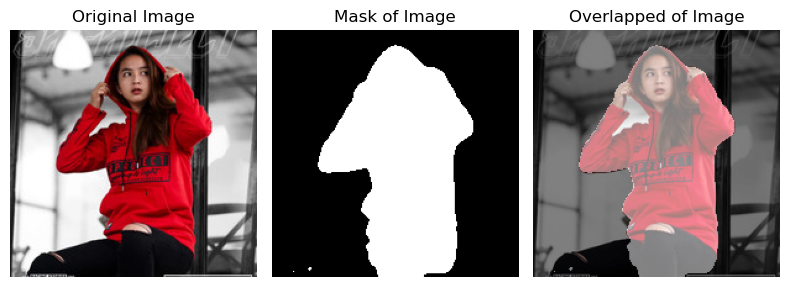

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(8, 4))

img = cv2.imread(TRAIN_PATH + '11.png')

ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

image_mask = rembg.remove(
    data=img, 
    alpha_matting_foreground_threshold=255,
    alpha_matting_background_threshold=0,
    only_mask=True,
    post_process_mask=True
)

ax[1].imshow(cv2.cvtColor(image_mask, cv2.COLOR_BGR2RGB))
ax[1].set_title('Mask of Image')
ax[1].axis('off')

image = cv2.addWeighted(img, 0.5, cv2.cvtColor(image_mask, cv2.COLOR_BGR2RGB), 0.5, 0)

ax[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[2].set_title('Overlapped of Image')
ax[2].axis('off')

plt.tight_layout()
plt.show()

In [23]:
"""
Gambar berhasil membuat mask dengan tepat, walaupun terdapat beberapa bagian yang tidak terdeteksi dengan baik. 
Objek yang terdeteksi otomatis adalah objek yang memiliki warna yang berbeda dengan background. Dalam hal ini yang lebih dominan
adalah objek kaos atau hoodie yang memiliki warna yang berbeda dengan background.

Selanjutnya, gambar di overlapped dengan mask yang telah dibuat. Dan dilanjut dengan menghapus background pada gambar tersebut.
"""

def remove_bg(PATH, SAVE_PATH):
    filenames = os.listdir(PATH)
    for filename in tqdm(filenames, desc=f"Removing background in {PATH}"):
        if filename.endswith('.png'):
            img = cv2.imread(PATH + filename)
            mask = rembg.remove(img)
            cv2.imwrite(SAVE_PATH + filename, mask)
            
remove_bg(TRAIN_PATH, TRAIN_PATH_SAVE)
remove_bg(TEST_PATH, TEST_PATH_SAVE)

Removing background in penyisihan-hology-7-data-mining-competition/train/train/: 100%|██████████| 777/777 [28:31<00:00,  2.20s/it]  
Removing background in penyisihan-hology-7-data-mining-competition/test/test/: 100%|██████████| 334/334 [06:49<00:00,  1.22s/it]


## **Crop ROI of Image**

In [39]:
TRAIN_PATH = 'preprocess-dataset/train_preproc/'
TRAIN_PATH_SAVE = 'preprocess-dataset/train_final/'

TEST_PATH = 'preprocess-dataset/test_preproc/'
TEST_PATH_SAVE = 'preprocess-dataset/test_final/'

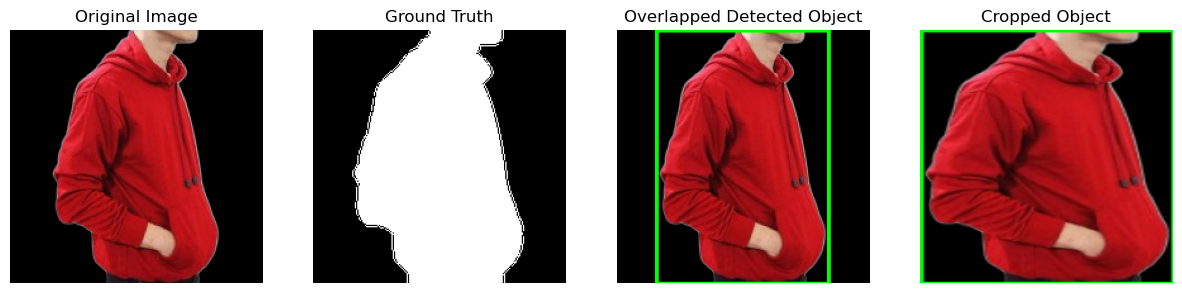

In [3]:
original = cv2.imread(f'dataset/test_preproc/1111.png')
image = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
largest_contour = None

for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        largest_contour = contour

if largest_contour is not None:
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

ax[1].imshow(binary, cmap='gray')
ax[1].set_title('Ground Truth')
ax[1].axis('off')

ax[2].imshow(image)
ax[2].set_title('Overlapped Detected Object')
ax[2].axis('off')

cropped = image[y:y+h, x:x+w]
cropped = cv2.resize(cropped, (224, 224))
ax[3].imshow(cropped)
ax[3].set_title('Cropped Object')
ax[3].axis('off')

plt.show()

In [31]:
"""
Karena gambar background merupakan gambar dengan area hitam, gambar di overlapped dan kemudian pada bagian mask yang terdeteksi,
gambar di deteksi ROI nya untuk diambil bagian objeknya saja (area klasifikasi).
"""

def crop_original_image_to_cropped_object(TRAIN_PATH, TRAIN_PATH_SAVE):
    filenames = os.listdir(TRAIN_PATH)
    for filename in tqdm(filenames, desc=f"Cropping images in {TRAIN_PATH}"):
        original = cv2.imread(TRAIN_PATH + filename)
        image = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        max_area = 0
        largest_contour = None
        
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > max_area:
                max_area = area
                largest_contour = contour
                
        if largest_contour is not None:
            x, y, w, h = cv2.boundingRect(largest_contour)
            cropped = original[y:y+h, x:x+w]
            cv2.imwrite(TRAIN_PATH_SAVE + filename, cropped)
            
crop_original_image_to_cropped_object(TRAIN_PATH, TRAIN_PATH_SAVE)
crop_original_image_to_cropped_object(TEST_PATH, TEST_PATH_SAVE)

Cropping images in dataset/test_preproc/: 100%|██████████| 334/334 [00:01<00:00, 257.49it/s]


## **Crop Area Below Face Detection of Image**

In [17]:
TRAIN_PATH = 'preprocess-dataset/train_final/'
TRAIN_PATH_SAVE = 'preprocess-dataset/train_end/'

TEST_PATH = 'preprocess-dataset/test_final/'
TEST_PATH_SAVE = 'preprocess-dataset/test_end/'

In [19]:
def face_detected(IMAGE_PATH):
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))

    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    image = cv2.imread(IMAGE_PATH)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ax[0].imshow(image)
    ax[0].set_title('Original Image')
    ax[0].axis('off')

    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

    ax[1].imshow(image)
    ax[1].set_title('Detected Face')
    ax[1].axis('off')

    if len(faces) > 0:
        x, y, w, h = faces[0]
        cropped = image[y+h:, :]
        
        ax[2].imshow(cropped)
        ax[2].set_title('Cropped Under Face')
        ax[2].axis('off')
    else:
        ax[2].imshow(image)
        ax[2].set_title('No Face Detected')
        ax[2].axis('off')

    plt.show()

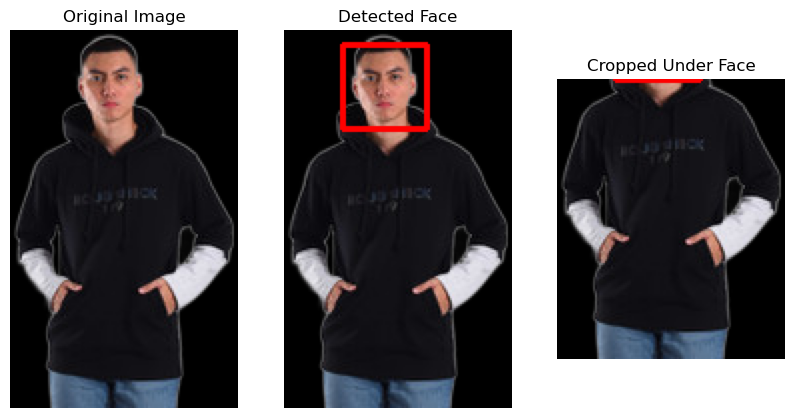

In [20]:
face_detected('dataset/train_final/6.png')

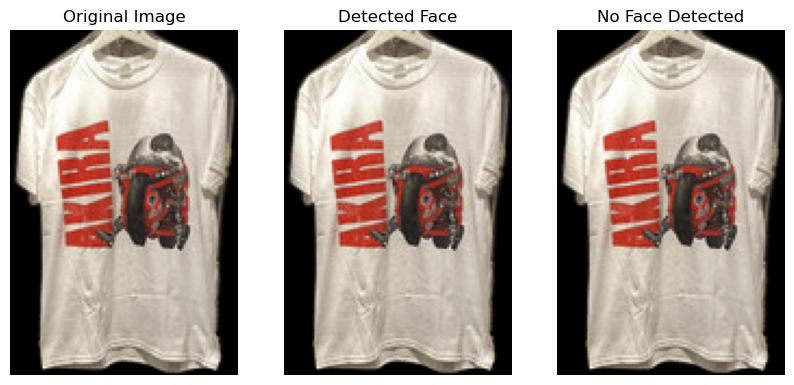

In [22]:
face_detected('dataset/train_final/5.png')

In [72]:
"""
Apabila pada gambar terprediksi adanya wajah, maka gambar akan di crop pada bagian bawah wajah. Jika tidak ada wajah yang terdeteksi,
maka gambar akan tetap sama.
"""

def crop_face_to_cropped_under_face(TRAIN_PATH, TRAIN_PATH_SAVE):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    filenames = os.listdir(TRAIN_PATH)
    for filename in tqdm(filenames, desc=f"Cropping images in {TRAIN_PATH}"):
        image = cv2.imread(TRAIN_PATH + filename)
        
        faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        if len(faces) > 0:
            x, y, w, h = faces[0]
            cropped = image[y+h:, :]
            cv2.imwrite(TRAIN_PATH_SAVE + filename, cropped)
        else:
            cv2.imwrite(TRAIN_PATH_SAVE + filename, image)

crop_face_to_cropped_under_face(TRAIN_PATH, TRAIN_PATH_SAVE)
crop_face_to_cropped_under_face(TEST_PATH, TEST_PATH_SAVE)

Cropping images in dataset/test_final/: 100%|██████████| 334/334 [00:02<00:00, 142.58it/s]


## **Different Between Image Before and After Preprocessing**

In [12]:
BASELINE_PATH = 'base-dataset/train/train/'
FINAL_PATH = 'preprocess-dataset/train_end/'

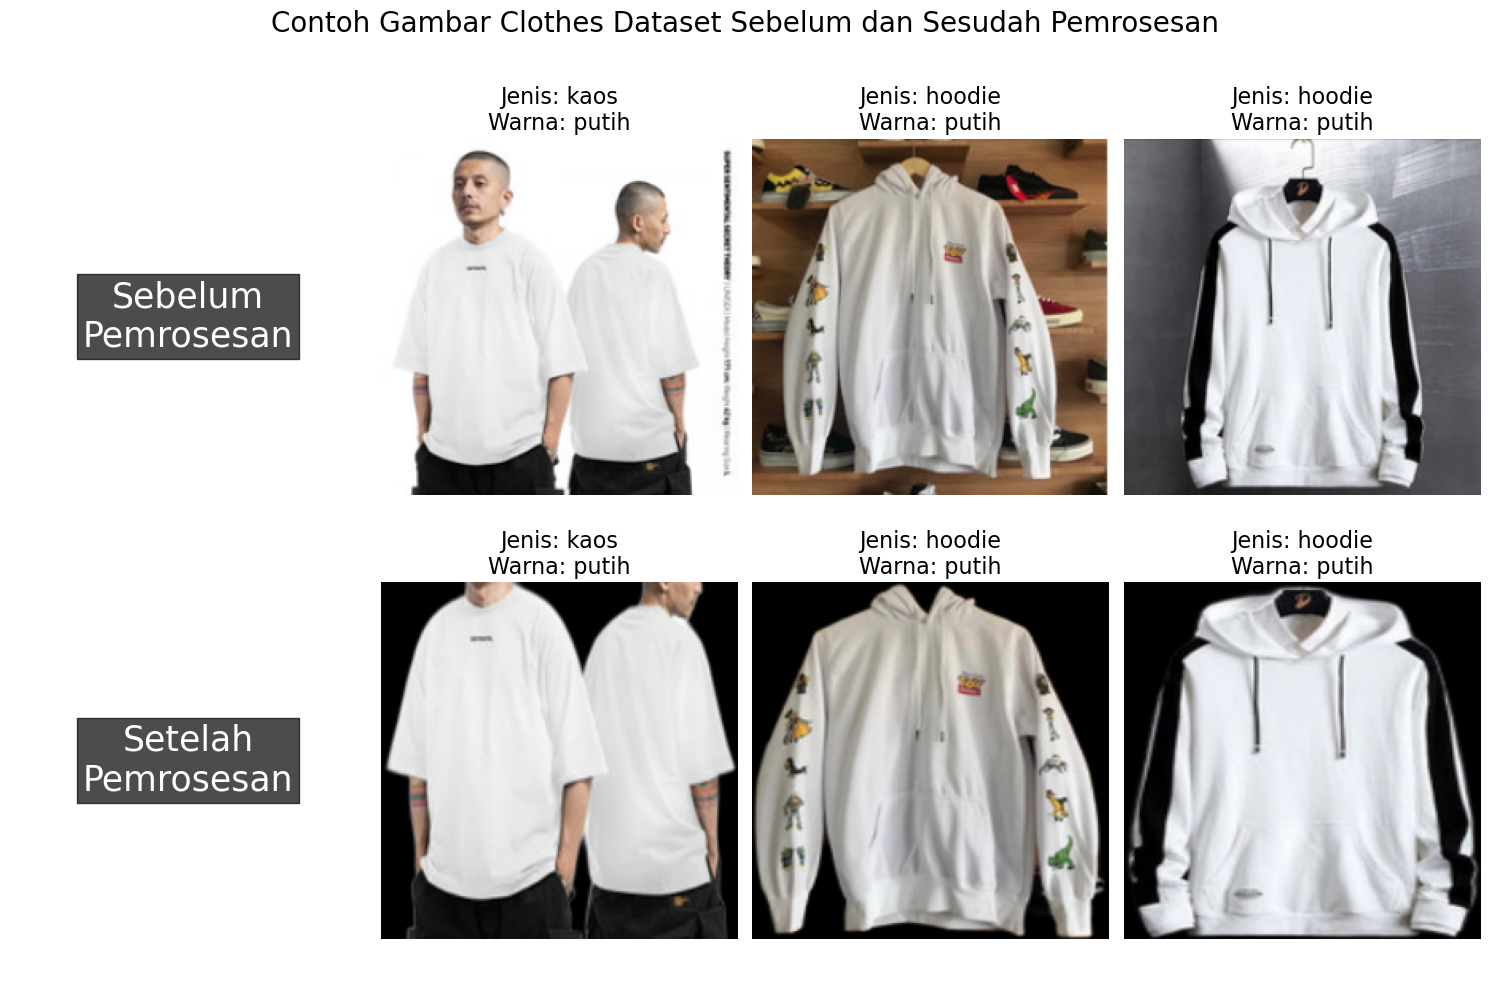

In [13]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))

plt.suptitle("Contoh Gambar Clothes Dataset Sebelum dan Sesudah Pemrosesan", fontsize=20)

for i in range(2):
    if i == 0:
        PATH = BASELINE_PATH
        ax[i, 0].text(0.5, 0.5, "Sebelum\nPemrosesan", color='white', fontsize=25, 
                     ha='center', va='center', bbox=dict(facecolor='black', alpha=0.7))
        ax[i, 0].axis('off')
    else:
        PATH = FINAL_PATH
        ax[i, 0].text(0.5, 0.5, "Setelah\nPemrosesan", color='white', fontsize=25, 
                     ha='center', va='center', bbox=dict(facecolor='black', alpha=0.7))
        ax[i, 0].axis('off')
        
    for j in range(1, 4):
        img = cv2.imread(PATH + df.iloc[j+19]['id'])
        img = cv2.resize(img, (224, 224))
        ax[i, j].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax[i, j].set_title(f"Jenis: {df.iloc[j+19]['jenis']}\nWarna: {df.iloc[j+19]['warna']}", fontsize=16)
        ax[i, j].axis('off')
        
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **Image Augmentation**

In [15]:
"""
Karena setelah kami cek, pada data test terdapat beberapa gambar yang terotasi 
miring sedikit (tidak 90 derajat dan tidak terlalu jauh miringnya). Maka kami melakukan
augmentasi data dengan merotasi gambar pada data train sebanyak 4 kali dengan kriteria:
1. Rotasi 10 derajat searah jarum jam
2. Rotasi 10 derajat berlawanan arah jarum jam
3. Rotasi 15 derajat searah jarum jam
4. Rotasi 15 derajat berlawanan arah jarum jam
"""

TRAIN_PATH = 'preprocess-dataset/train_end/'
TRAIN_PATH_SAVE = 'preprocess-dataset/train_augm/'

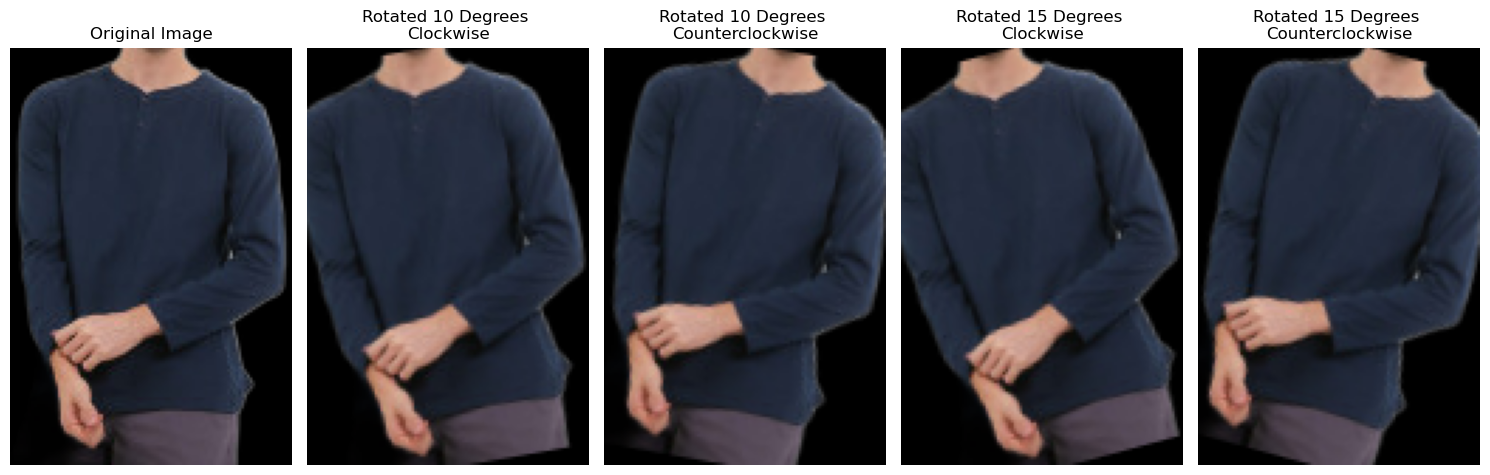

In [16]:
img = TRAIN_PATH + '686.png'
image = cv2.imread(img)

fig, ax = plt.subplots(1, 5, figsize=(15, 5))

rotations = [
    (0, 'Original Image'),
    (10, 'Rotated 10 Degrees \nClockwise'),
    (-10, 'Rotated 10 Degrees \nCounterclockwise'),
    (15, 'Rotated 15 Degrees \nClockwise'),
    (-15, 'Rotated 15 Degrees \nCounterclockwise')
]

rows, cols = image.shape[:2]

for i, (angle, title) in enumerate(rotations):
    if angle == 0:
        ax[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        rotated = cv2.warpAffine(image, M, (cols, rows))
        ax[i].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))

    ax[i].set_title(title)
    ax[i].axis('off')

plt.tight_layout()
plt.show()

In [16]:
def augmentation(TRAIN_PATH, TRAIN_PATH_SAVE, degree, name):
    filenames = os.listdir(TRAIN_PATH)
    for filename in tqdm(filenames, desc=f"Augmenting images in {TRAIN_PATH}"):
        image = cv2.imread(TRAIN_PATH + filename)
        rows, cols = image.shape[:2]
        
        M = cv2.getRotationMatrix2D((cols / 2, rows / 2), degree, 1)
        rotated = cv2.warpAffine(image, M, (cols, rows))
        
        cv2.imwrite(TRAIN_PATH_SAVE + name + filename, rotated)

augmentation(TRAIN_PATH, TRAIN_PATH_SAVE, 0, 'original_')
augmentation(TRAIN_PATH, TRAIN_PATH_SAVE, 10, 'rotated_10_clockwise_')
augmentation(TRAIN_PATH, TRAIN_PATH_SAVE, -10, 'rotated_10_counterclockwise_')
augmentation(TRAIN_PATH, TRAIN_PATH_SAVE, 15, 'rotated_15_clockwise_')
augmentation(TRAIN_PATH, TRAIN_PATH_SAVE, -15, 'rotated_15_counterclockwise_')

Augmenting images in dataset/train_end/: 100%|██████████| 777/777 [00:02<00:00, 302.19it/s]


In [7]:
"""
Karena proses pelatihan data dilakukan melalui perantara file csv, maka kami mengubah data yang telah di augmentasi ke dalam file csv
menyesuaikan format penamaan augmentasi data yang telah kami lakukan.
"""

augmented_data = []

for prefix in ['original_', 'rotated_10_clockwise_', 'rotated_10_counterclockwise_', 'rotated_15_clockwise_', 'rotated_15_counterclockwise_']:
    augmented_df = df.copy()
    augmented_df['id'] = augmented_df['id'].apply(lambda x: f'{prefix}{x}')
    augmented_data.append(augmented_df)

df_augmented = pd.concat(augmented_data, ignore_index=True)
df_augmented.to_csv('base-dataset/dataset_augmented.csv', index=False)
df_augmented.head()

id   jenis   warna
0  original_1.png  hoodie  kuning
1  original_2.png    kaos    biru
2  original_3.png  hoodie   hitam
3  original_4.png  hoodie  kuning
4  original_5.png    kaos   putih

# **Optional Testing**

In [4]:
"""
id : ID unik tiap foto produk dalam data test
jenis: Jenis pakaian (0: Kaos, 1: Hoodie)
warna: Warna pakaian (0: merah, 1: kuning, 2:biru, 3: hitam, 4:putih)
"""

df = pd.read_csv('base-dataset/train.csv')

reverse_mapping_jenis = {
    0: 'kaos',
    1: 'hoodie'
}

reverse_mapping_warna = {
    0: 'merah',
    1: 'kuning',
    2: 'biru',
    3: 'hitam',
    4: 'putih'   
}

df['jenis'] = df['jenis'].map(reverse_mapping_jenis)
df['warna'] = df['warna'].map(reverse_mapping_warna)

df.to_csv('benchmark/train_map_reverse.csv', index=False)

In [4]:
df = pd.read_csv('benchmark/train_map_reverse.csv')

mapping_jenis = {
    'kaos': 0,
    'hoodie': 1
}

mapping_warna = {
    'merah': 0,
    'kuning': 1,
    'biru': 2,
    'hitam': 3,
    'putih': 4
}

df['jenis'] = df['jenis'].map(mapping_jenis)
df['warna'] = df['warna'].map(mapping_warna)

df.to_csv('benchmark/train_benchmark.csv', index=False)